## Video Game Sales Exloratory Data Analysis (EDA)

The purpose in this project is to analyse the dataset of Video Games Sales. I would like to show with visualizations the most interesting information that come out from the data. So, I got a paper, i wrote down several questions about 'v.g.s.' dataset and I tried to answer my own questions. Eventhough, I searched in Wiki for more information to understand better the 1980 decade.

### First things first
This is a Kaggle dataset. This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz](www.vgchartz.com).

**Fields include**

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [1]:
# import Pandas and Numpy packages
import pandas as pd
import numpy as np

# import data
df=pd.read_csv('vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Let's start to visualize data and answer questions!

In [2]:
# check for na's
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
# explore "Year" a little more
df.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

How can we be sure if game sales are true for the year 2020.

In [4]:
# check for Data Entry Errors
df.loc[(df['Year']>2017)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


Please don't panic. Google is by our side ! Click [here!](http://bfy.tw/BqU9)

"*Imagine: Makeup Artist (April 12, 2009)*" for Nintendo DS.

Seems that someone was on a hurry. Perhaps 2010 is the right year and became 2020 by mistake.

In [5]:
# How many Platforms do we have?
len(df.Platform.unique())

31

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


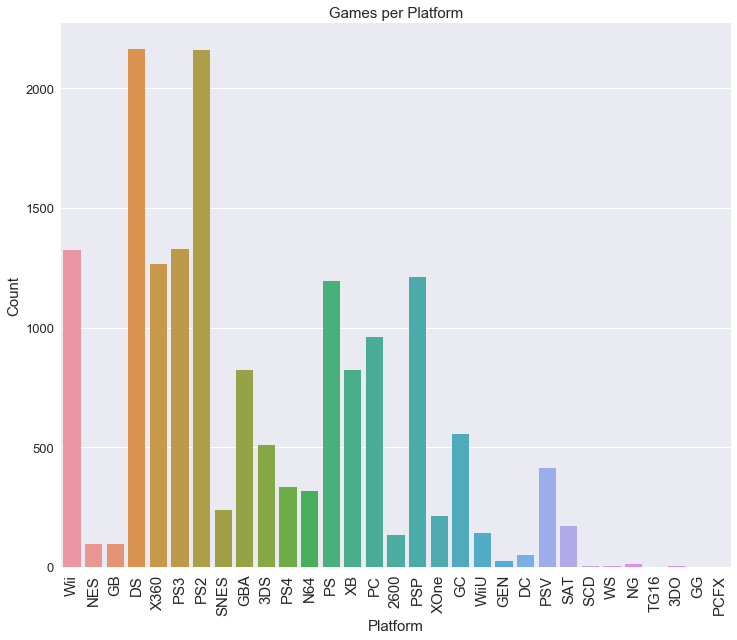

In [6]:
# Which Platform have more games than any other?
import seaborn as sns
import matplotlib.pyplot as plt

print(df.Platform.value_counts())

fig,ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='Platform',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=13)
plt.xlabel('Platform',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Games per Platform',fontsize=15)
plt.show()

Nintendo DS and Sony PS3 are pretty close

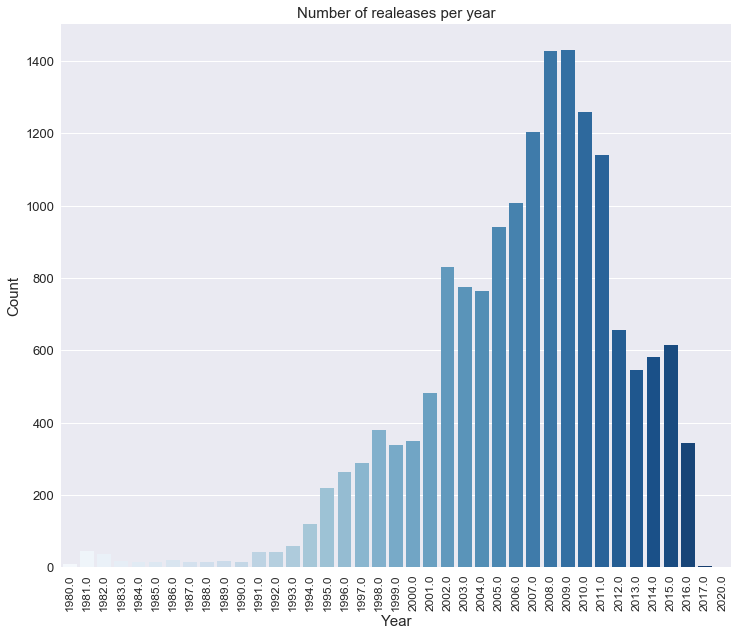

In [7]:
# Which year do we have the biggest number of game releases for all platforms

df.Year.value_counts()

fig,ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='Year',data=df,palette='Blues')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Number of realeases per year',fontsize=15)
plt.show()

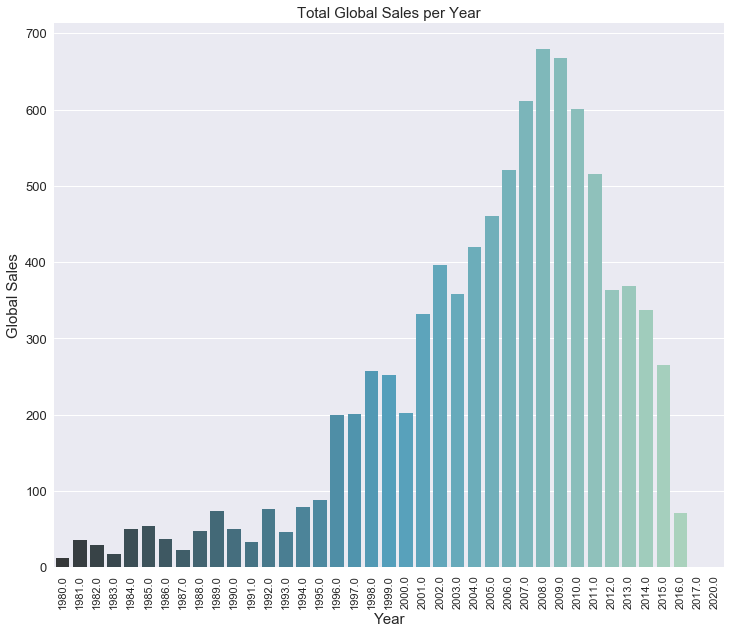

In [8]:
# Which Year do we have the biggest sum of global sales for all publishers?

groupGlobal=df[['Year','Global_Sales']].groupby(['Year'],as_index=False).sum()

fig,ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='Year' ,y='Global_Sales' ,data=groupGlobal,palette='GnBu_d')
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Global Sales',fontsize=15)
plt.title('Total Global Sales per Year',fontsize=15)
plt.show()

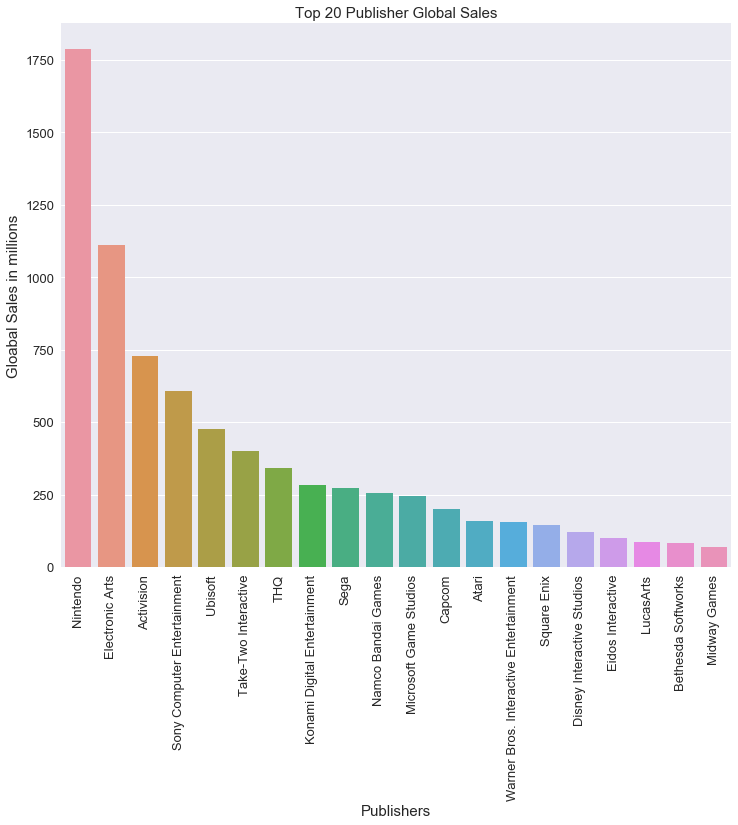

In [9]:
# Top 20 best "Publisher's Global Sales"

global_=df[['Global_Sales','Publisher']].groupby(['Publisher'],as_index=False).sum().sort_values(['Global_Sales'],ascending=False)
global_= global_.nlargest(20, ['Global_Sales','Publisher'])

fig,ax = plt.subplots(figsize=(12, 10))
sns.barplot(global_.Publisher,global_.Global_Sales,data=global_)
plt.ylabel('Gloabal Sales in millions',fontsize=15)
plt.xlabel('Publishers',fontsize=15)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 20 Publisher Global Sales",fontsize=15)
plt.show()

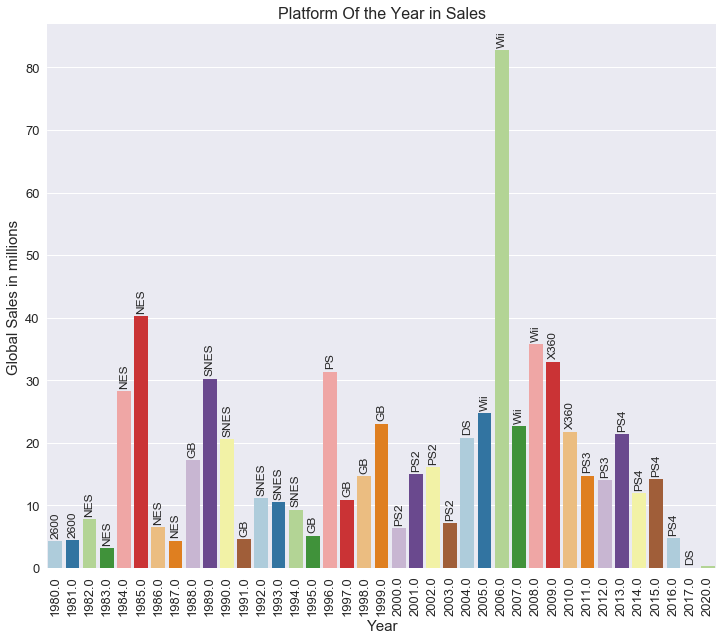

In [10]:
# Platform Of The Year in Sales

soty = df[['Global_Sales','Year']].groupby(['Year']).max()

soty2=[]
soty3=[]

for i in soty.index:
    soty2.append(np.where((df['Year']==i)&(df['Global_Sales']==soty['Global_Sales'][i])))


for i in soty2:
    soty3.append(df.iloc[i]['Platform'])

soty3 = pd.DataFrame({"Platform": soty3})


labels=pd.Series([])
for i in range(1,39):
    labels=labels.append(soty3.Platform[i])

# plot
fig,ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x=soty.index, y=soty.Global_Sales,data=soty,palette='Paired')
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('Year',fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Global Sales in millions',fontsize=15)
plt.title('Platform Of the Year in Sales',fontsize=16)
rects = ax.patches

labels=labels

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.5 , label, rotation=90, ha='center', va='bottom',)

plt.show()


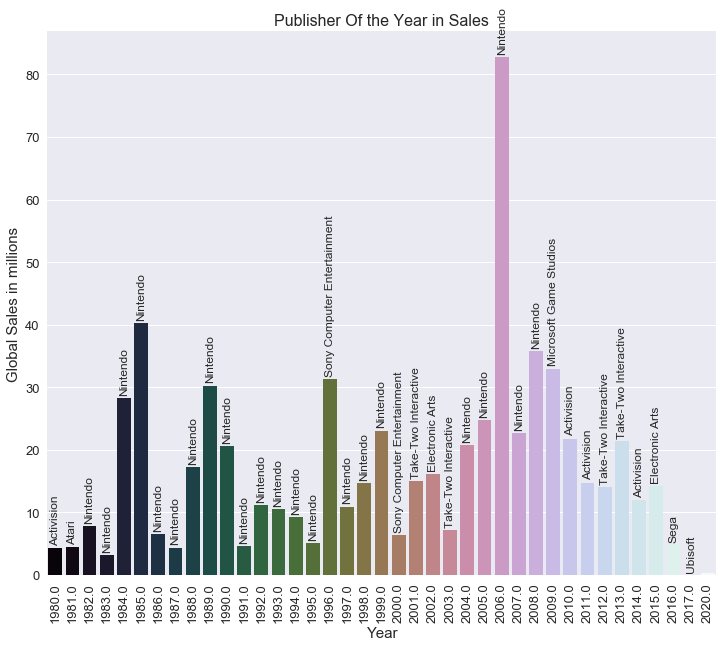

In [11]:
# Publisher Of The Year In Sales

poty = df[['Global_Sales','Year']].groupby(['Year']).max()

poty2=[]
poty3=[]

for i in poty.index:
    poty2.append(np.where((df['Year']==i)&(df['Global_Sales']==poty['Global_Sales'][i])))


for i in poty2:
    poty3.append(df.iloc[i]['Publisher'])

poty3 = pd.DataFrame({"Platform": poty3})


labels=pd.Series([])
for i in range(1,39):
    labels=labels.append(poty3.Platform[i])

# plot 
fig,ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x=poty.index, y=poty.Global_Sales,data=poty,palette="cubehelix")
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('Year',fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Global Sales in millions',fontsize=15)
plt.title('Publisher Of the Year in Sales',fontsize=16)
rects = ax.patches

labels=labels

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.5 , label, rotation=90, ha='center', va='bottom',)

plt.show()


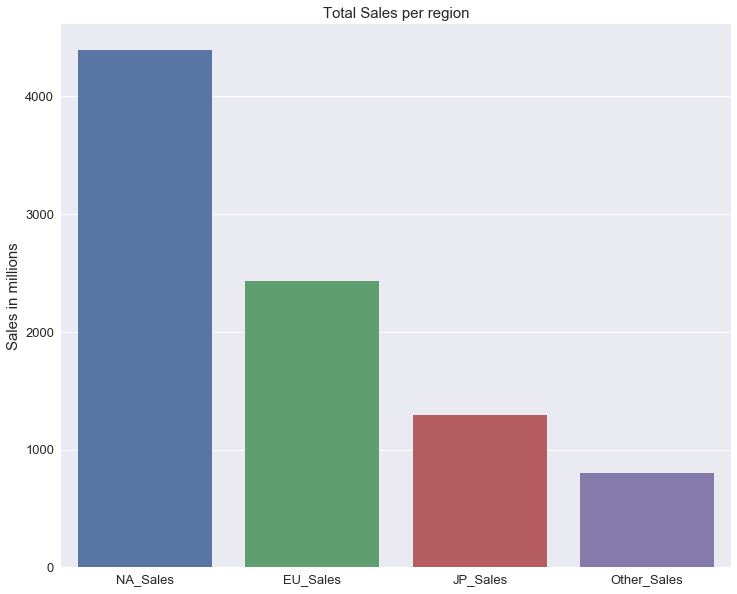

In [12]:
# Total Sales per region

total_territory=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]    
total_territory.sum(axis=0)

fig,ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=total_territory.columns.values,y=total_territory.sum(axis=0))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Sales in millions',fontsize=15)
plt.title('Total Sales per region',fontsize=15)
plt.show()

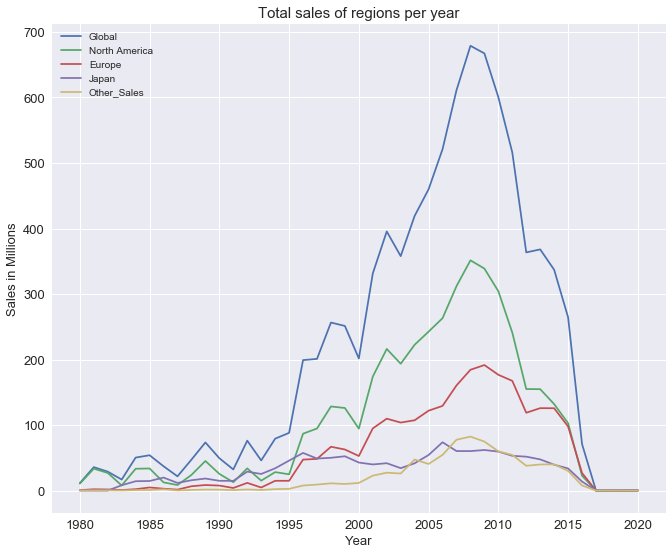

In [13]:
# Total sales of regions per year

total_sales = df.groupby('Year').agg({'Global_Sales': np.sum, 'NA_Sales': np.sum,
                      'EU_Sales': np.sum, 'JP_Sales': np.sum, 'Other_Sales': np.sum})
fig,ax = plt.subplots(figsize=(11, 9))
plt.plot(total_sales.Global_Sales, label='Global')
plt.plot(total_sales.NA_Sales, label='North America')
plt.plot(total_sales.EU_Sales, label='Europe')
plt.plot(total_sales.JP_Sales, label='Japan')
plt.plot(total_sales.Other_Sales, label='Other_Sales')
plt.ylabel('Sales in Millions',fontsize=13)
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Total sales of regions per year',fontsize=15)
plt.show()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


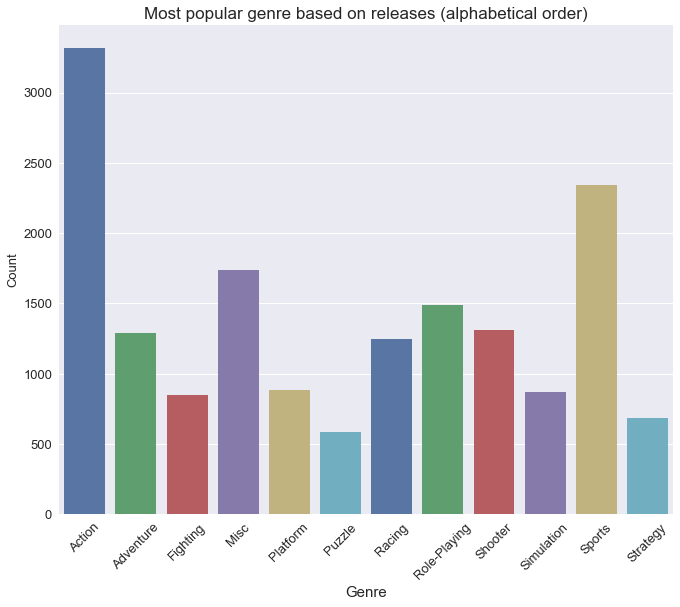

In [14]:
# Most popular Genre

print(df.Genre.value_counts())

fig,ax = plt.subplots(figsize=(11, 9))
sns.countplot(x=df['Genre'].sort_values(),data=df,palette='deep')
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.title('Most popular genre based on releases (alphabetical order)',fontsize=17)
plt.show()

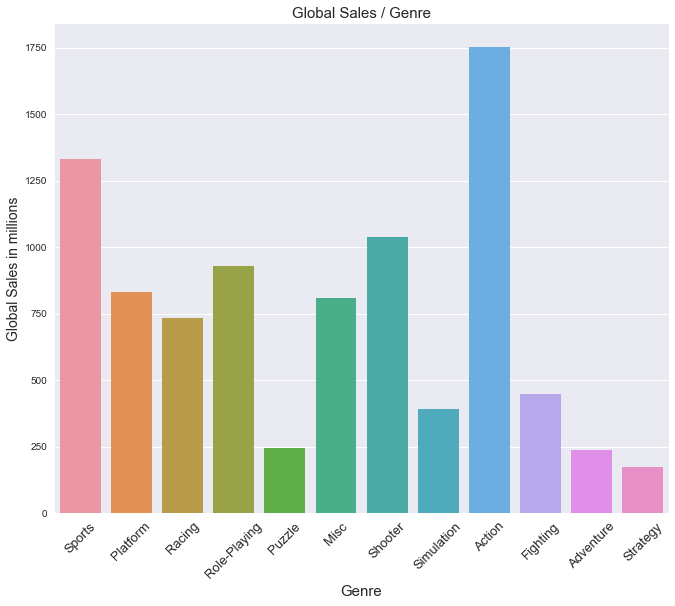

In [15]:
# Global Sales for each Genre

sale1 = []

for i in df['Genre'].unique():
    sale1.append(df[df['Genre'] == i]['Global_Sales'].sum())    

    
fig,ax = plt.subplots(figsize=(11, 9))
sns.barplot(x = df['Genre'].unique(),y = sale1)
plt.xticks(rotation=45,fontsize=13)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Global Sales in millions',fontsize=14)
plt.title('Global Sales / Genre',fontsize=15)
plt.show()

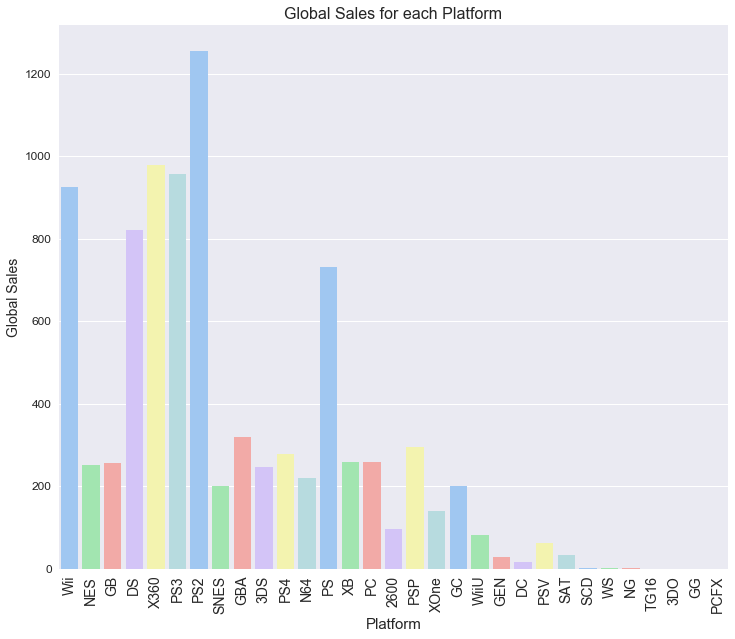

In [16]:
# Global Sales per platform

sale2=[]
for i in df['Platform'].unique():
    sale2.append(df[df['Platform']==i]['Global_Sales'].sum())

fig,ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=df['Platform'].unique(),y=sale2,palette='pastel')    
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Platform',fontsize=15)
plt.ylabel('Global Sales',fontsize=14)
plt.yticks(fontsize=12)
plt.title('Global Sales for each Platform',fontsize=16)
plt.show()

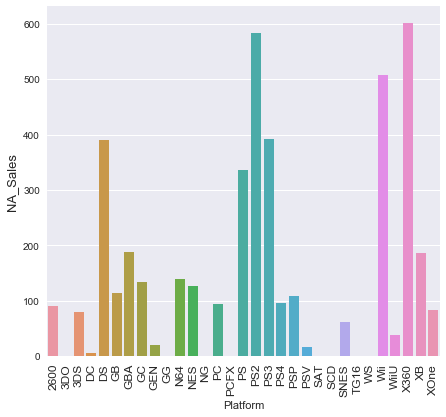

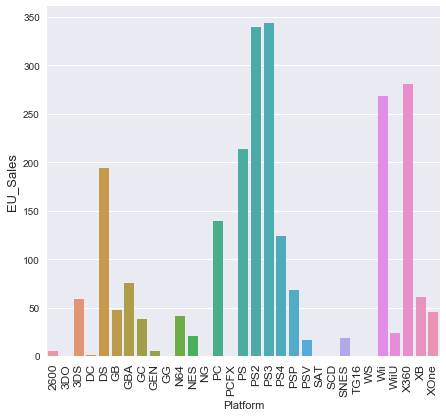

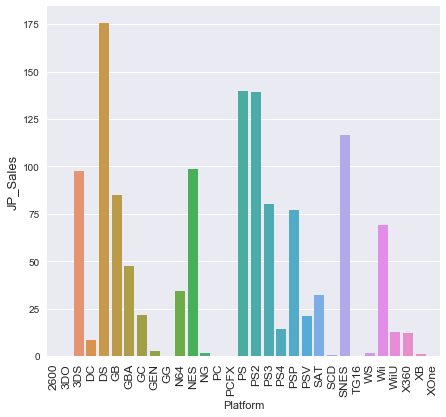

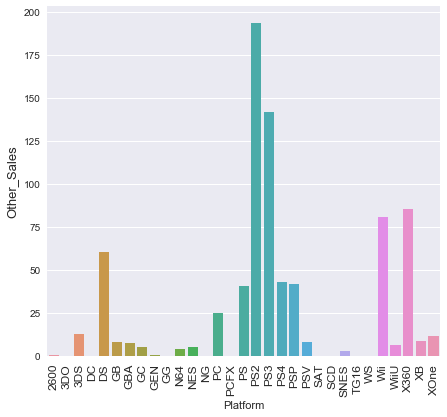

In [17]:
# sales per region / platform

new_group=df.groupby(['Platform'],as_index=False).sum().drop(['Rank','Year'],axis=1)

regions=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
subs=[1,2,3,4]
for i,j in zip(subs,regions):
    fig,ax = plt.subplots(figsize=(12, 11))
    plt.subplot(2,2,i)
    sns.barplot(x='Platform',y=j,data=new_group)
    plt.xticks(rotation=90,fontsize=12)
    plt.ylabel(j,fontsize=13)
    plt.tight_layout()
    plt.show()

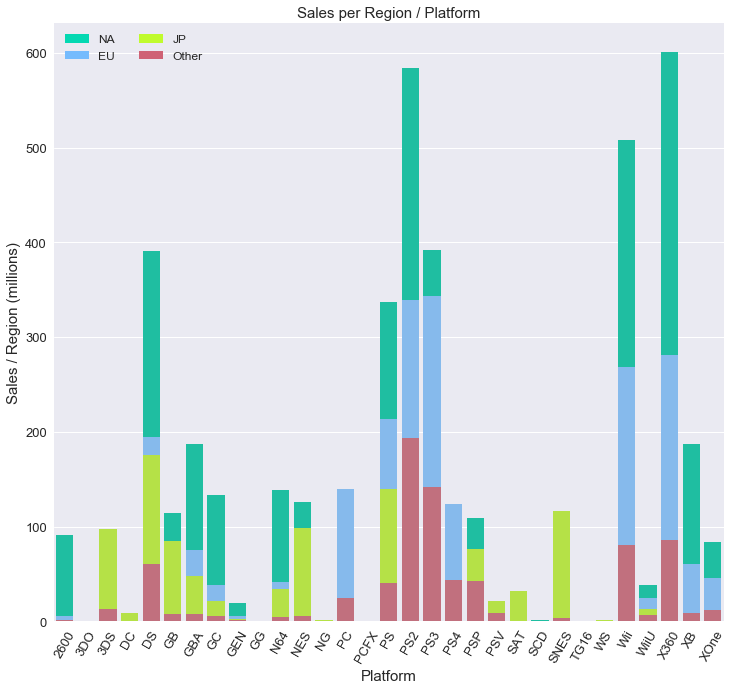

In [18]:
# Sales per Region / Platform

fig,ax = plt.subplots(figsize=(12, 11))

r11=sns.barplot(x='Platform', y='NA_Sales', data=new_group, color = '#04d8b2')
r22=sns.barplot(x='Platform', y='EU_Sales', data=new_group, color = '#75bbfd')
r33=sns.barplot(x='Platform', y='JP_Sales', data=new_group, color='#c0fb2d')
r44=sns.barplot(x='Platform', y='Other_Sales', data=new_group, color='#cf6275')


NA = plt.Rectangle((0,0),1,1,fc='#04d8b2', edgecolor = 'none')
EU = plt.Rectangle((0,0),1,1,fc='#75bbfd',  edgecolor = 'none')
JP = plt.Rectangle((0,0),1,1,fc='#c0fb2d',  edgecolor = 'none')
Other = plt.Rectangle((0,0),1,1,fc='#cf6275',  edgecolor = 'none')

l = plt.legend([NA, EU, JP, Other], ['NA', 'EU', 'JP', 'Other'], loc=2, ncol = 2, prop={'size':12})
l.draw_frame(False)

sns.despine(left=True)
plt.xticks(rotation=60,fontsize=13)
plt.yticks(fontsize=13)
r11.set_ylabel('Sales / Region (millions)',fontsize=15)
r11.set_xlabel('Platform',fontsize=15)
r11.set_title('Sales per Region / Platform',fontsize=15)
plt.show()

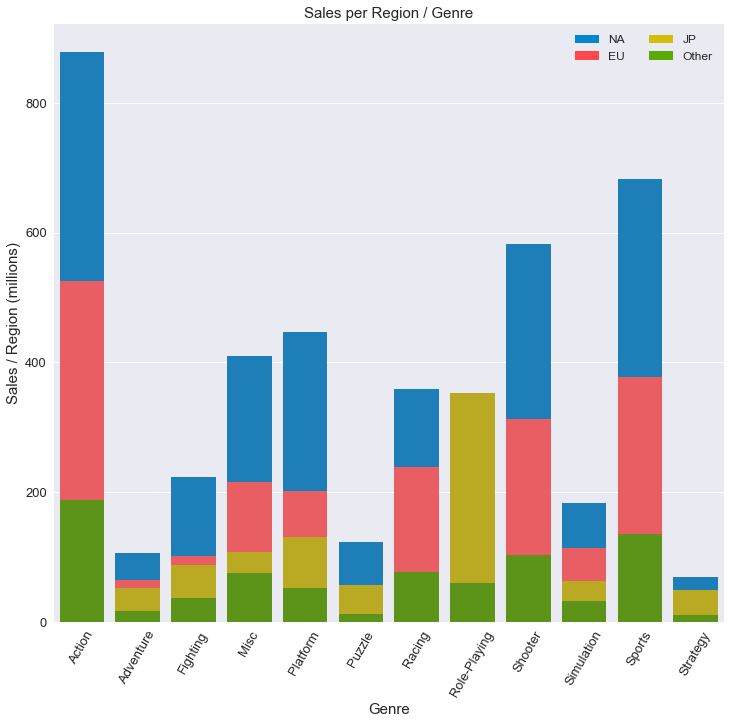

In [19]:
# # Sales per Region / Genre

new_group2=df.groupby(['Genre'],as_index=False).sum().drop(['Rank','Year'],axis=1)

fig,ax = plt.subplots(figsize=(12, 11))
r1=sns.barplot(x='Genre', y='NA_Sales', data=new_group2, color = '#0485d1')
r2=sns.barplot(x='Genre', y='EU_Sales', data=new_group2, color = '#ff474c')
r3=sns.barplot(x='Genre', y='JP_Sales', data=new_group2, color='#d2bd0a')
r4=sns.barplot(x='Genre', y='Other_Sales', data=new_group2, color='#5ca904')


NA = plt.Rectangle((0,0),1,1,fc='#0485d1', edgecolor = 'none')
EU = plt.Rectangle((0,0),1,1,fc='#ff474c',  edgecolor = 'none')
JP = plt.Rectangle((0,0),1,1,fc='#d2bd0a',  edgecolor = 'none')
Other = plt.Rectangle((0,0),1,1,fc='#5ca904',  edgecolor = 'none')

l = plt.legend([NA, EU, JP, Other], ['NA', 'EU', 'JP', 'Other'], loc=1, ncol = 2, prop={'size':12})
l.draw_frame(False)

sns.despine(left=True)
plt.xticks(rotation=60,fontsize=13)
plt.yticks(fontsize=13)
r1.set_ylabel('Sales / Region (millions)',fontsize=15)
r1.set_xlabel('Genre',fontsize=15)
r1.set_title('Sales per Region / Genre',fontsize=15)
plt.show()

**Next charts** are for Publishers which have more than 100 Game releases. Publishers grouped per region. Thus, we have US Publishers, JP Publishers and EU Publishers. Finally we have an 'unknown' Publisher (must be a data entry error) which we will drop from our dataframe.

In [20]:
# Select Publishers with 100+ releases

df['Counts'] = df.groupby(['Publisher'])['Name'].transform('count')

groupPR = df.groupby(['Counts','Publisher'],as_index=False).sum().sort_values('Counts',ascending=False)
groupPR=groupPR[:29]
print(groupPR.head())

     Counts                     Publisher     Rank       Year  NA_Sales  \
577  1351.0               Electronic Arts  7140412  2686562.0    595.07   
576   975.0                    Activision  6368325  1938979.0    429.70   
575   932.0            Namco Bandai Games  8741157  1863670.0     69.52   
574   921.0                       Ubisoft  6964728  1843194.0    253.43   
573   832.0  Konami Digital Entertainment  7331538  1650392.0     92.16   

     EU_Sales  JP_Sales  Other_Sales  Global_Sales  
577    371.27     14.04       129.77       1110.32  
576    215.53      6.54        75.34        727.46  
575     42.63    127.07        14.69        254.09  
574    163.32      7.50        50.26        474.72  
573     69.69     91.30        30.31        283.64  


In [21]:
# drop the 'Unknown' Publisher

groupPR=groupPR.drop([561])

In [22]:
# charachterize Publishers by their origin (check last column)

groupPR['origin']=groupPR.Publisher.replace({'Electronic Arts' :'US','Activision' :'US','THQ' :'US','Take-Two Interactive' :'US','Warner Bros. Interactive Entertainment' :'US',
       'Disney Interactive Studios' :'US','Midway Games' :'US','Microsoft Game Studios' :'US','Acclaim Entertainment' :'US','Vivendi Games' : 'US','Namco Bandai Games' :'JP',
       'Konami Digital Entertainment' :'JP','Nintendo' :'JP','Sony Computer Entertainment' :'JP','Sega' :'JP','Capcom' :'JP','Tecmo Koei' :'JP','Square Enix' :'JP','D3Publisher' :'JP',
       'Idea Factory' :'JP','Nippon Ichi Software' :'JP','Ubisoft' :'EU','Atari' :'EU','Eidos Interactive' :'EU','505 Games' :'EU','Codemasters' :'EU','Deep Silver' :'EU',
       'Zoo Digital Publishing' :'EU'})
print(groupPR.head())
print()
print('- number of publishers per region')
print(groupPR.origin.value_counts())

     Counts                     Publisher     Rank       Year  NA_Sales  \
577  1351.0               Electronic Arts  7140412  2686562.0    595.07   
576   975.0                    Activision  6368325  1938979.0    429.70   
575   932.0            Namco Bandai Games  8741157  1863670.0     69.52   
574   921.0                       Ubisoft  6964728  1843194.0    253.43   
573   832.0  Konami Digital Entertainment  7331538  1650392.0     92.16   

     EU_Sales  JP_Sales  Other_Sales  Global_Sales origin  
577    371.27     14.04       129.77       1110.32     US  
576    215.53      6.54        75.34        727.46     US  
575     42.63    127.07        14.69        254.09     JP  
574    163.32      7.50        50.26        474.72     EU  
573     69.69     91.30        30.31        283.64     JP  

- number of publishers per region
JP    11
US    10
EU     7
Name: origin, dtype: int64


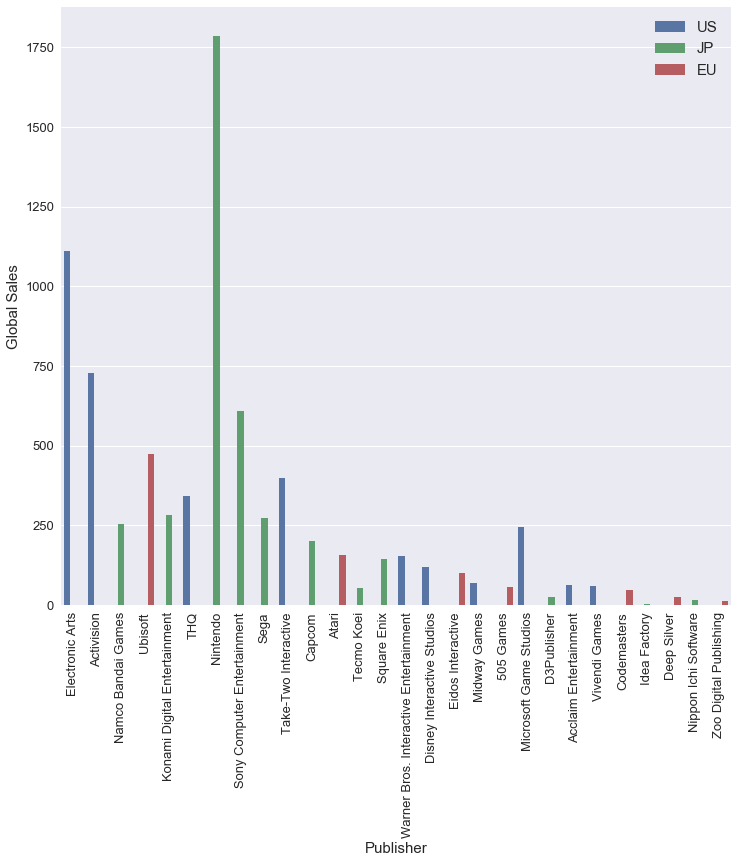

In [23]:
fig,ax = plt.subplots(figsize=(12, 11))
sns.barplot(x='Publisher',y='Global_Sales',hue='origin',data=groupPR)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Publisher',fontsize=15)
plt.ylabel('Global Sales',fontsize=15)
plt.legend(loc=1,prop={'size':15})
plt.show()

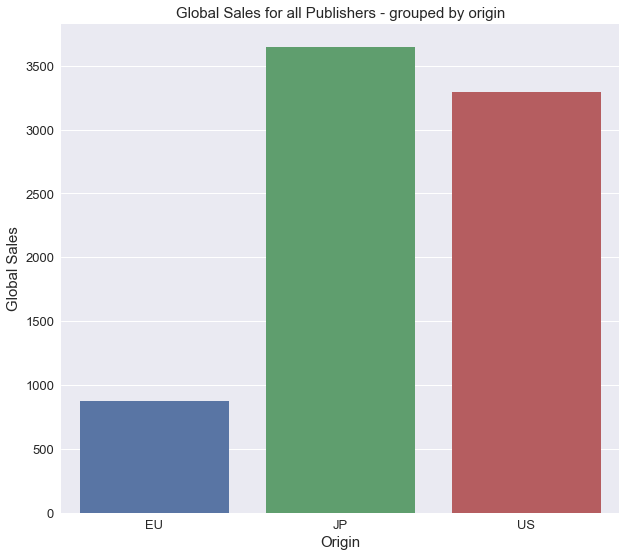

In [24]:
team_origin=groupPR.groupby(['origin'],as_index=False).sum()
team_origin=team_origin.drop(['Rank','Year','Counts'],axis=1)

fig,ax = plt.subplots(figsize=(10, 9))

sns.barplot(x='origin', y='Global_Sales', data=team_origin)
plt.title('Global Sales for all Publishers - grouped by origin',fontsize=15)
plt.ylabel('Global Sales',fontsize=15)
plt.xlabel('Origin',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

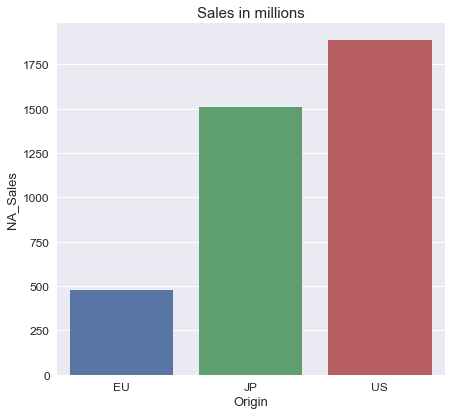

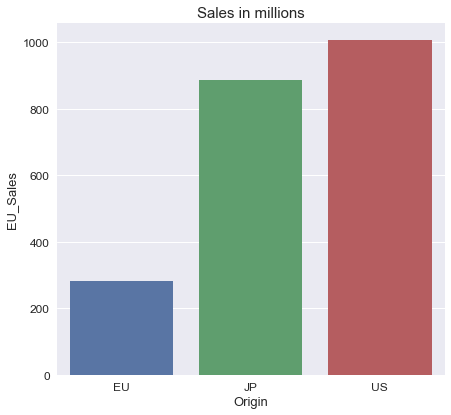

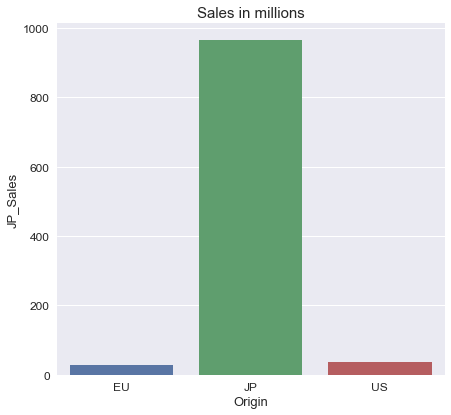

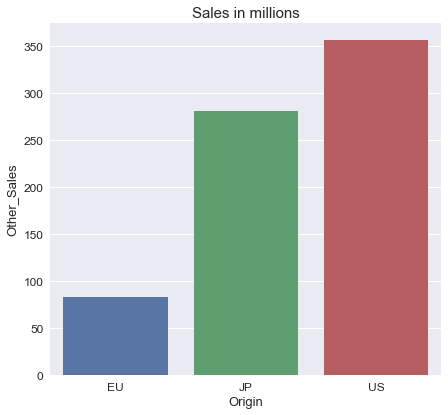

In [25]:
regions=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
subs=[1,2,3,4]

for i,j in zip(subs,regions):
    fig,ax = plt.subplots(figsize=(12, 11))
    plt.subplot(2,2,i)
    sns.barplot(x='origin',y=j,data=team_origin)
    plt.ylabel(j,fontsize=13)
    plt.xlabel('Origin',fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Sales in millions',fontsize=15)
    plt.tight_layout()
    plt.show()

Wow, Japanese Publishers are dominating in their country!